### Exploratory Data Analysis

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import pacf
import seaborn as sns
from statsmodels.sandbox.distributions.multivariate import multivariate_t_rvs
import requests

In [179]:
data = []
data.append({
    'label': 'brent',
    'desc': 'Brent Oil Futures',
    'url': 'https://github.com/vpozdnyakov/cond_gen_models_in_tradings/raw/main/data/Brent%20Oil%20Futures%20Historical%20Data.csv',
    'ts': None,
    'lr': None
})
data.append({
    'label': 'crude',
    'desc': 'Crude Oil WTI Futures',
    'url': 'https://github.com/vpozdnyakov/cond_gen_models_in_tradings/raw/main/data/Crude%20Oil%20WTI%20Futures%20Historical%20Data.csv',
    'ts': None,
    'lr': None
})
data.append({
    'label': 'gasoline',
    'desc': 'Gasoline RBOB Futures',
    'url': 'https://github.com/vpozdnyakov/cond_gen_models_in_tradings/raw/main/data/Gasoline%20RBOB%20Futures%20Historical%20Data.csv',
    'ts': None,
    'lr': None
})
data.append({
    'label': 'heating',
    'desc': 'Heating Oil Futures',
    'url': 'https://github.com/vpozdnyakov/cond_gen_models_in_tradings/raw/main/data/Heating%20Oil%20Futures%20Historical%20Data.csv',
    'ts': None,
    'lr': None
})
data.append({
    'label': 'gas_oil',
    'desc': 'London Gas Oil Futures',
    'url': 'https://github.com/vpozdnyakov/cond_gen_models_in_tradings/raw/main/data/London%20Gas%20Oil%20Futures%20Historical%20Data.csv',
    'ts': None,
    'lr': None
})
data.append({
    'label': 'natural_gas',
    'desc': 'Natural Gas Futures',
    'url': 'https://raw.githubusercontent.com/vpozdnyakov/cond_gen_models_in_tradings/main/data/Natural%20Gas%20Futures%20Historical%20Data.csv',
    'ts': None,
    'lr': None
})

In [180]:
for i in data:
    brent = pd.read_csv(i['url'], index_col=0)
    brent.index = pd.to_datetime(brent.index)
    brent = brent[brent.index >= pd.to_datetime('2015-01-01')]
    i['ts'] = brent.Price.astype(float)

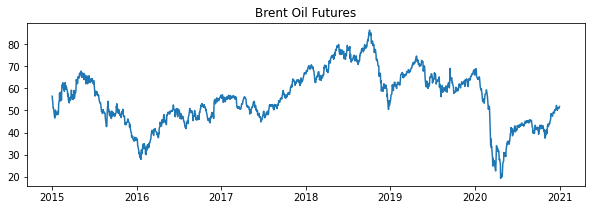

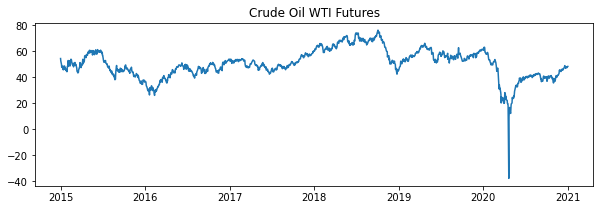

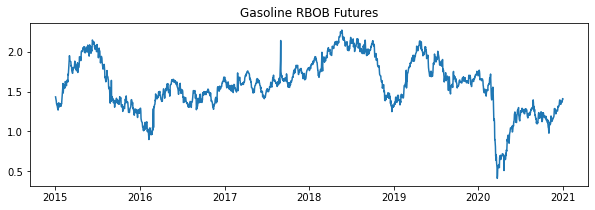

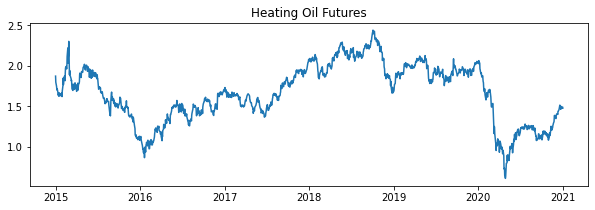

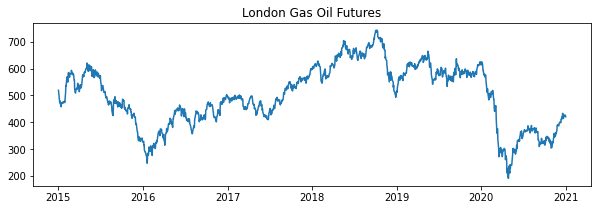

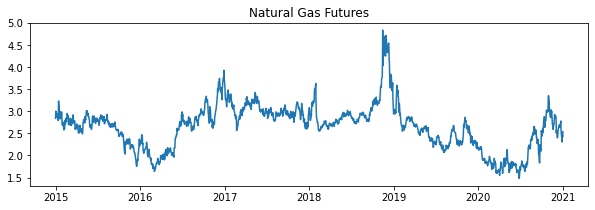

In [181]:
for i in data:
    plt.figure(figsize=(10, 3))
    plt.plot(i['ts'])
    plt.title(i['desc']);

In [182]:
for i in data:
    ts = i['ts'].values
    #if ts.min() < 0:
    #    ts -= ts.min() - 1
    lr = pd.Series(np.log(ts[1:]) - np.log(ts[:-1]))
    lr.index = i['ts'].index[1:]
    lr = lr.fillna(0)
    i['lr'] = lr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


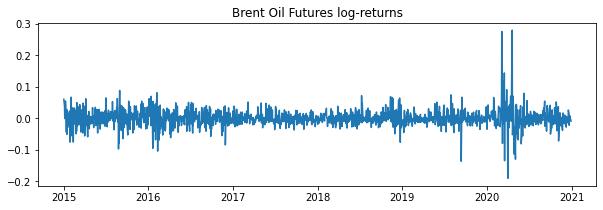

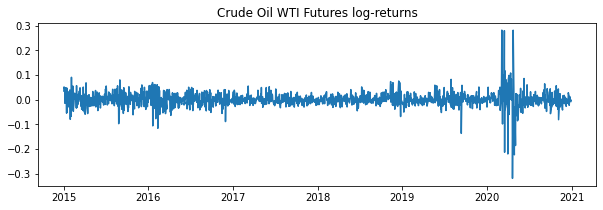

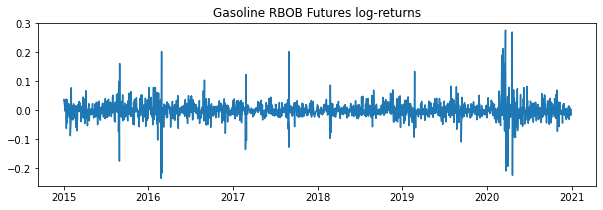

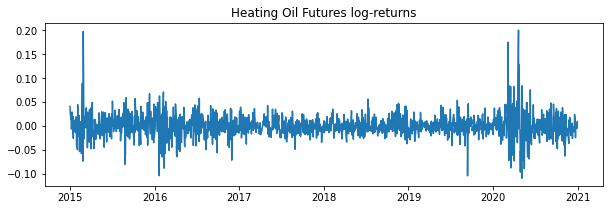

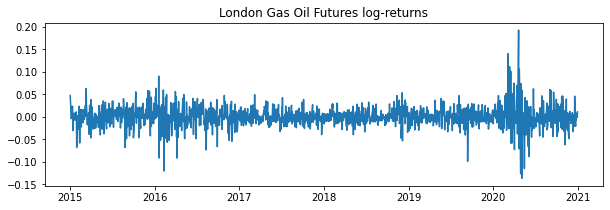

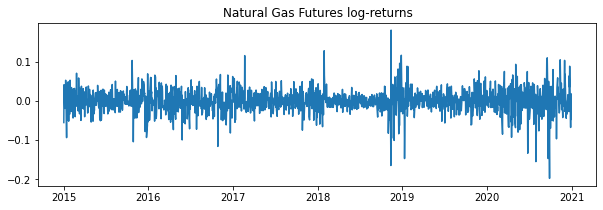

In [183]:
for i in data:
    plt.figure(figsize=(10, 3))
    plt.plot(i['lr'])
    plt.title('{} log-returns'.format(i['desc']));

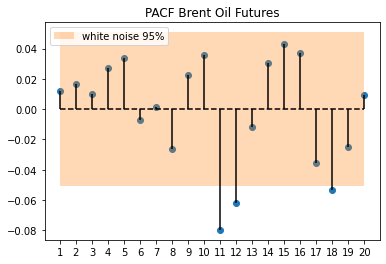

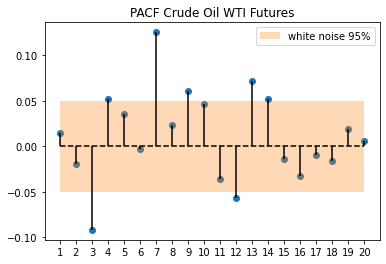

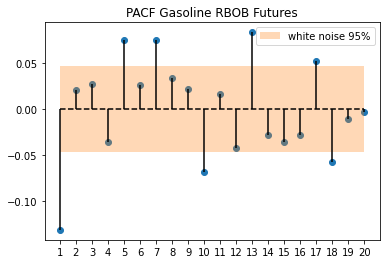

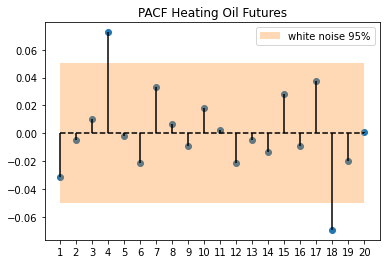

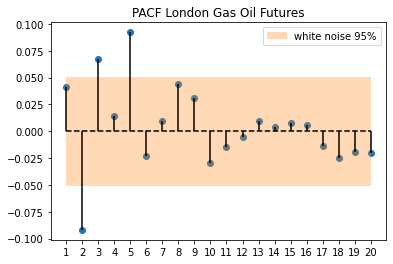

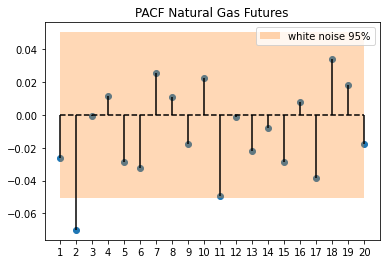

In [215]:
nlags = 20
for i in data:    
    pacf_val = pacf(i['lr'], nlags=nlags)[1:]
    plt.scatter(range(1, nlags+1), pacf_val)
    plt.vlines(range(1, nlags+1), np.zeros(nlags-1), pacf_val)
    plt.hlines([0], [1], [nlags], linestyles='--')
    plt.title('PACF {}'.format(i['desc']))
    plt.xticks(np.arange(1, nlags+1));
    wn_value = 2 / np.sqrt(i['lr'].shape[0])
    plt.fill_between(
        np.arange(1, nlags+1), 
        wn_value, 
        -wn_value, 
        alpha=0.3, 
        label='white noise 95%')
    plt.legend()
    plt.show()

In [185]:
from statsmodels.tsa.stattools import adfuller
for i in data:
    res = adfuller(i['lr'])
    status = 'Stationary' if res[1] <= 0.05 else 'Non-stationary'
    print(i['desc'], 'p-value: {}'.format(round(res[1], 4)), status)

Brent Oil Futures p-value: 0.0 Stationary
Crude Oil WTI Futures p-value: 0.0 Stationary
Gasoline RBOB Futures p-value: 0.0 Stationary
Heating Oil Futures p-value: 0.0 Stationary
London Gas Oil Futures p-value: 0.0 Stationary
Natural Gas Futures p-value: 0.0 Stationary


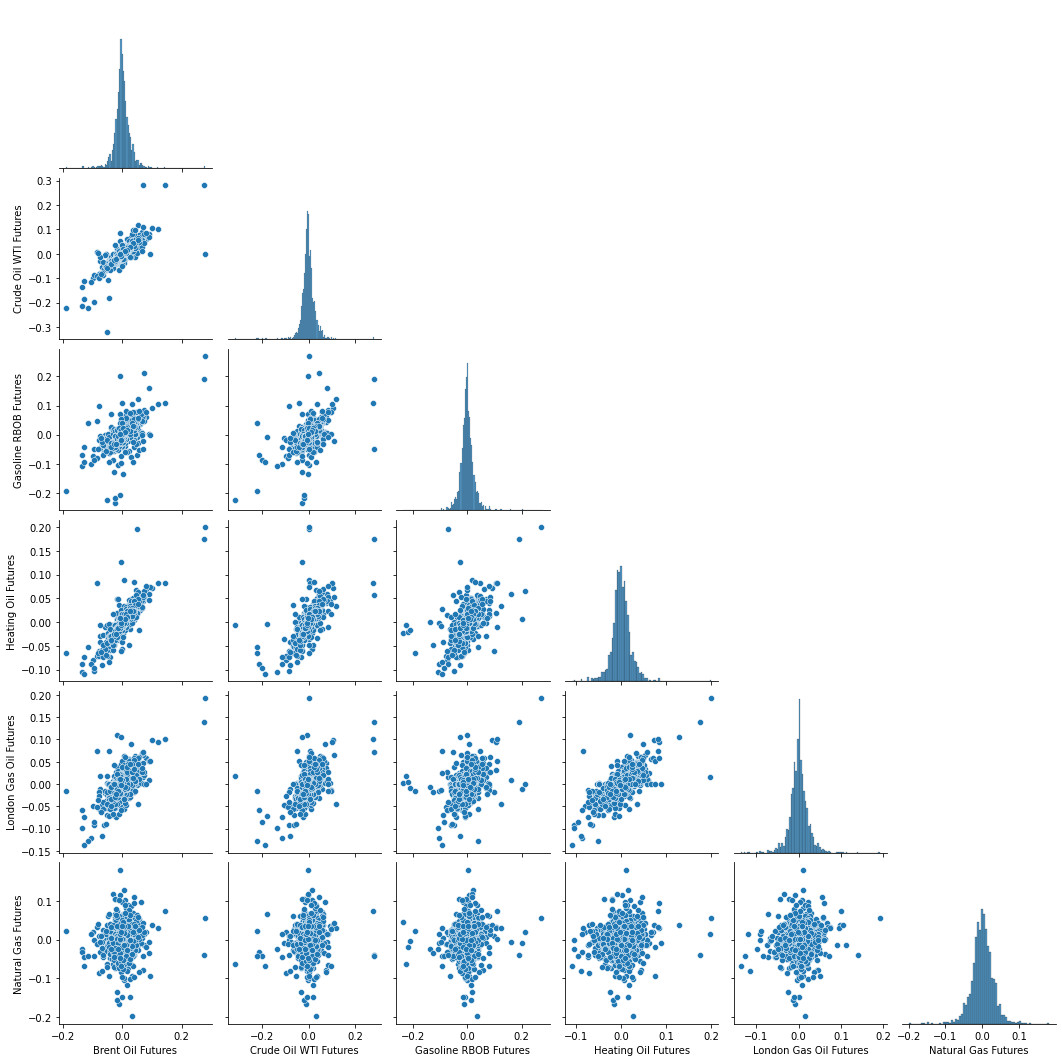

In [208]:
df = pd.concat([i['lr'] for i in data], axis=1)
df = df.rename(columns={n: i['desc'] for n, i in enumerate(data)})
sns.pairplot(df, corner=True, dropna=True);

In [212]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')
df

,Brent Oil Futures,Crude Oil WTI Futures,Gasoline RBOB Futures,Heating Oil Futures,London Gas Oil Futures,Natural Gas Futures
Date,,,,,,
2015-01-01,0.060458,0.034875,0.036952,0.040757,0.046818,-0.055456
2015-01-02,0.060458,0.051603,0.036952,0.026236,0.046818,0.041127
2015-01-05,0.038581,0.043081,0.019813,0.013236,0.016277,-0.019245
2015-01-06,-0.000978,-0.014910,0.012408,0.015353,0.020726,0.023069
2015-01-07,0.003721,-0.002874,-0.002464,-0.006509,-0.004701,-0.019318
...,...,...,...,...,...,...
2020-12-24,0.008419,0.012728,0.009765,0.007410,-0.007645,0.088384
2020-12-27,0.008419,0.012728,-0.001610,0.007410,-0.007645,0.088384
2020-12-28,-0.004512,-0.007948,-0.014661,-0.005260,0.004698,-0.067922
